First 5 rows of the dataset:
     User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Missing values in each column:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Summary statistics of the dataset:
             User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     8

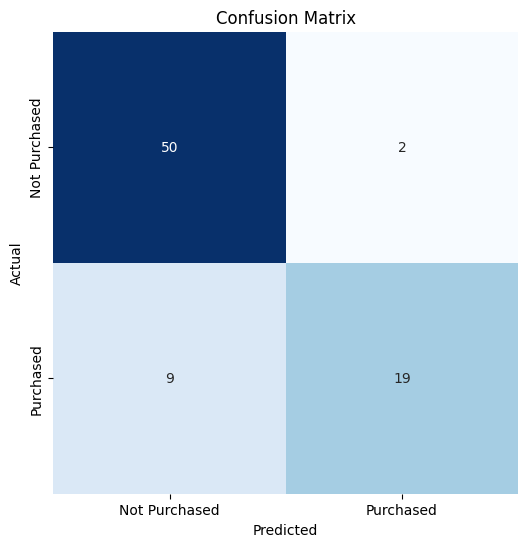

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Step 2: Load and Explore the Data
# Load the Social Network Ads dataset (replace the path with your actual dataset location)
df = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:\n", df.head())

# Check for any missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Get summary statistics of the dataset
print("\nSummary statistics of the dataset:\n", df.describe())

# Step 3: Data Preprocessing
# Assuming 'Age' and 'EstimatedSalary' are the features and 'Purchased' is the target variable
# We will drop any unnecessary columns (if any) and prepare the feature matrix (X) and target vector (y)
X = df[['Age', 'EstimatedSalary']]  # Features
y = df['Purchased']  # Target variable

# Step 4: Split the Data into Training and Testing Sets
# We will use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Feature Scaling
# Logistic Regression is sensitive to feature scaling, so we scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Train the Logistic Regression Model
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Make Predictions
# Use the trained model to predict the target values on the test set
y_pred = model.predict(X_test)

# Step 8: Confusion Matrix and Evaluation Metrics

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Extract True Positives (TP), False Positives (FP), True Negatives (TN), and False Negatives (FN)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

# Calculate the Accuracy, Error rate, Precision, Recall, and F1 Score
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'\nAccuracy: {accuracy}')
print(f'Error Rate: {error_rate}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Step 9: Visualize the Confusion Matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

